In [1]:
# Import relevant libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats

In [2]:
# Load data for comparisons

df = pd.read_excel(r'D:\Jorge\Data\CP personal data.xlsx')
print(df)

            Unnamed: 0  AGE CP  BDICP  BAI CP  SEX  VASCP  \
0        EEG1 (Dev-om)    18.0   14.0    13.0  2.0    3.0   
1        EEG2 (Om-dev)    19.0   26.0    23.0  1.0    6.0   
2          EEG3 om dev    19.0    9.0    21.0  2.0    3.0   
3          EEG4 om dev    29.0   14.0     6.0  1.0    2.0   
4          EEG5 dev om    62.0    7.0     7.0  2.0    6.0   
5          EEG6 om dev    43.0   20.0    23.0  2.0    4.0   
6          EEG7 dev om    68.0   12.0     2.0  2.0    3.0   
7                 EEG8    28.0   36.0     9.0  2.0    6.0   
8                 EEG9    62.0   11.0    13.0  2.0    7.0   
9         EEG10 OM-DEV    33.0    1.0     7.0  1.0    5.0   
10  EEG13 ( 11) OM DEV    58.0   13.0     8.0  2.0    4.0   
11              EEG 12    61.0    7.0     8.0  2.0    4.0   
12               EEG13    24.0    2.0    11.0  1.0    2.0   
13        EEG14 OM DEV    38.0   12.0    15.0  1.0    1.0   
14        EEG15 DEV OM    67.0    1.0     1.0  2.0    1.0   
15        EEG16 DEV OM  

In [3]:
# Extract meaningful information for analyses of age, sex, BDI and BAI

# Age
Age = [df['AGE CP'].iloc[:25],df['AGE CONTROLS']] # Because CP group has 25 subjects and we don't want absent entries to be included as Nans

# Sex
Sex = [df['SEX'].iloc[:25],df['GENDER CONTROLS']]

# BDI
BDI = [df['BDICP'].iloc[:25],df['BDI CONTROLS']]

# BAI
BAI = [df['BAI CP'].iloc[:25],df['BAI CONTROLS']]


In [4]:
# Perform independent samples t tests for age, BDI and BAI differences between the groups
Vars = [Age, BDI, BAI]

t_results = []
for ivar in range(len(Vars)):
    temp = stats.ttest_ind(Vars[ivar][0], Vars[ivar][1])
    t_results.append(temp)


In [7]:
# Create list of mean and standard deviation values for both groups to make plotting easier
str_vars = ['Age', 'BDI', 'BAI']
group_names = ['CP', 'HC']

std_data =[]
mn_data = []
for ivar in range(len(Vars)):
    mn_data.append([Vars[ivar][0].mean(), Vars[ivar][1].mean()])
    std_data.append([Vars[ivar][0].std(), Vars[ivar][1].std()])
    

In [5]:
# Create function to swap asterisk for pvalues
def p_val_sig_star(pvalue):
    if pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

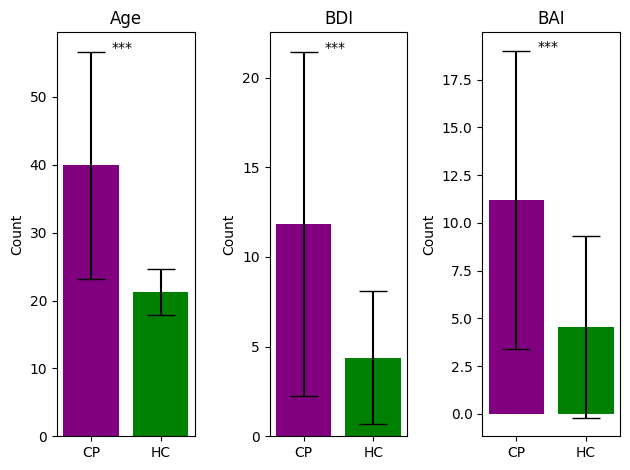

In [8]:
# Bar plot Age, BDI, and BAI data 

str_vars = ['Age', 'BDI', 'BAI']
group_names = ['CP', 'HC']

fig, axs = plt.subplots(1,3)

for ivar in range(len(Vars)):

    # plot barchart
    y_pos = np.arange(len(Vars[ivar]))
    axs[ivar].bar(y_pos,[mn_data[ivar][0],mn_data[ivar][1]], color = ['purple','green'], yerr = [std_data[ivar][0], std_data[ivar][1]],capsize = 10)

    # Add significance asterisks
    ast_pos = max(mn_data[ivar]) + max(std_data[ivar])               # asterisk position. Find perfect height above errorbars
    axs[ivar].text(0.3, ast_pos, p_val_sig_star(t_results[ivar][1])) # p_val stored in second index of t test result

    # final touches
    axs[ivar].set_xticks(y_pos, group_names) 
    axs[ivar].set_ylabel('Count')
    axs[ivar].set_title(str_vars[ivar])
    
fig.tight_layout()
